In [1]:
import networkx
import pandas as pd
from collections import Counter

In [2]:
thesis_df = pd.read_csv('theses_v2.csv')
thesis_df

,Unnamed: 0,title,school,department,degree,submitting_type,language,subfield,research_field,keyword,committee_chair,committee_members,graduation_year,partnering_agency,abstract_length,abstract
0,0,Does Inflammation Damage White Matter ...,Emory College,Neuroscience and Behavioral Biology,B.S.,Honors Thesis,English,NaN,"Health Sciences, Mental Health; Psychology, Ps...",Neurobiology; Depression; DTI Imaging,Boadie Dunlop,Kate O'Toole;Micheal Crutcher,2020,NaN,2451,Background: Major depressive disorder (MDD) is...
1,1,Chlorhexidine bigluconate resistance in Met...,Rollins School of Public Health,Epidemiology,M.P.H.,Master's Thesis,English,Epidemiology - MPH & MSPH,"Health Sciences, Epidemiology; Biology, Microb...",MRSA; Antimicrobial Resistance,Scott Fridkin,Sarah Satola,2020,NaN,2283,Background: With increased chlorhexidine use i...
2,2,IRF4 controls cell fate outcomes during the...,Laney Graduate School,Biological and Biomedical Sciences,Ph.D.,Dissertation,English,Genetics and Molecular Biology,"Health Sciences, Immunology; Biology, Cell; Bi...",Plasma cell; IRF4; B cell; MYC; L-selectin; CD...,Joshy Jacob;Roger B. Deal;Jeremy M. Boss;Willi...,NaN,2021,NaN,3042,Naive B cell (nB) differentiation to antibody-...
3,3,From Surviving to Thriving: Exploring Healt...,Candler School of Theology,Ministry,DMin,Dissertation,English,NaN,Theology,Succession,Jennifer Ayres,Teresa Fry Brown,2021,NaN,1092,This project focuses on developing strategic p...
4,4,Maternal Exposures to Cigarette Smoking and ...,Rollins School of Public Health,Epidemiology,M.P.H.,Master's Thesis,English,Epidemiology - MPH & MSPH,"Health Sciences, Public Health; Health Science...",case-control study; alcohol; birth defects; ep...,Vijaya Kancherla;Paul Romitti,NaN,2020,"University, college or education institution (...",2606,BACKGROUND: Congenital diaphragmatic hernia (...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,9976,Zimbabwe's Maturing HIV Epidemic: A Triangulat...,Rollins School of Public Health,Global Health,MPH,Master's Thesis,English,NaN,"Health Sciences, Public Health",Zimbabwe; HIV; AIDS; Data triangulation; human...,Roger Rochat,NaN,2015,"International governmental organization (e.g.,...",1955,Objective: To assess Zimbabwe's HIV prevalence...
9977,9977,Zooarchaeological Faunal Identifiability: Usin...,Emory College,Anthropology,B.S.,Honors Thesis,English,NaN,"Anthropology, Archaeology",GIS; Faunal Identifiability; Zooarchaeology,Jessica Thompson;Michael Page,John Lindo;Melvin Konner,2019,NaN,2160,Zooarchaeological analysis aims to identify th...
9978,9978,Zoomorphic Others: The Animalization of Stigma...,Laney Graduate School,English and Creative Writing,MA,Master's Thesis,English,NaN,"Literature, General; Literature, Modern",animality; criminality; zoomorphism; animaliza...,Laura Otis,Christina Marie Colvin;Sari B Altschuler,2016,NaN,1584,"Zoomorphism, the act of portraying humans with..."
9979,9979,Zoonotic Diseases in Refugee or Internally Dis...,Rollins School of Public Health,Global Health,MPH,Master's Thesis,English,NaN,"Agriculture, Animal Pathology; Health Sciences...",Zoonotic Disease; Conflict; Refugee Camp; Camp...,Stephanie Salyer,Casey Barton-Behravesh;Carlos Navarro Colorado,2017,CDC,2238,Introduction: Emerging and re-emerging zoonoti...


In [3]:
thesis_df['department'].isna().sum()

17

In [4]:
prof_to_dep = dict()

for idx, row in thesis_df.iterrows():
    
    advisor = ''
    committee = ''
    if type(row['committee_chair']) == str:
        advisor = row['committee_chair'].split(';')
        
    if type(row['committee_members']) == str:
        committee = row['committee_members'].split(';')
    
    if advisor and committee:
        advisor = advisor + committee
    elif (not advisor) and committee:
        advisor = committee
    elif (not advisor) and (not committee):
        print('Advisor: ' + str(row['committee_chair']) + ', Committee: ' + str(row['committee_members']))
        advisor = []
    
    if not type(row['department'])== str:
        print('this is null')
        continue
    
    for member in advisor:
        if member not in prof_to_dep:
            prof_to_dep[member] = []
        if row['department'] not in prof_to_dep[member]: prof_to_dep[member].append(row['department'].strip())

Advisor: nan, Committee: nan
this is null
this is null
this is null
this is null
Advisor: nan, Committee: nan
this is null
this is null
Advisor: nan, Committee: nan
this is null
this is null
this is null
this is null
this is null
this is null
this is null
this is null
this is null
this is null
this is null


In [5]:
len(prof_to_dep)

5610

In [6]:
prof_to_dep

{'Boadie Dunlop': ['Neuroscience and Behavioral Biology'],
 "Kate O'Toole": ['Neuroscience and Behavioral Biology',
  'Biology',
  'Psychology',
  'Math and Computer Science',
  'Chemistry'],
 'Micheal Crutcher': ['Neuroscience and Behavioral Biology'],
 'Scott Fridkin': ['Epidemiology',
  'Behavioral Sciences and Health Education',
  'Global Health'],
 'Sarah Satola': ['Epidemiology'],
 'Joshy Jacob': ['Biological and Biomedical Sciences'],
 'Roger B. Deal': ['Biological and Biomedical Sciences', 'Biology'],
 'Jeremy M. Boss': ['Biological and Biomedical Sciences'],
 'William G. Kelly': ['Biological and Biomedical Sciences', 'Biology'],
 'Ignacio Sanz': ['Biological and Biomedical Sciences'],
 'Jennifer Ayres': ['Ministry', 'Divinity', 'Religion'],
 'Teresa Fry Brown': ['Ministry', 'Religion'],
 'Vijaya Kancherla': ['Epidemiology',
  'Biostatistics and Bioinformatics',
  'Public Health'],
 'Paul Romitti': ['Epidemiology'],
 'Rabindra Tirouvanziam': ['Biological and Biomedical Sciences

In [7]:
connections = Counter()
for prof in prof_to_dep:
#     print("Prof: " + prof)
    size = len(prof_to_dep[prof])
    for i in range(0, size):
        for j in range(i+1, size):
            dep_1 = prof_to_dep[prof][i]
            dep_2 = prof_to_dep[prof][j]
            if dep_1 < dep_2:
                tmp = dep_1
                dep_1 = dep_2
                dep_2 = tmp
            connection = (dep_1, dep_2)
            
            if connection not in connections: connections[connection] = 0
            connections[connection]+=1
connections

Counter({('Neuroscience and Behavioral Biology', 'Biology'): 88,
         ('Psychology', 'Neuroscience and Behavioral Biology'): 97,
         ('Neuroscience and Behavioral Biology',
          'Math and Computer Science'): 5,
         ('Neuroscience and Behavioral Biology', 'Chemistry'): 26,
         ('Psychology', 'Biology'): 33,
         ('Math and Computer Science', 'Biology'): 9,
         ('Chemistry', 'Biology'): 51,
         ('Psychology', 'Math and Computer Science'): 7,
         ('Psychology', 'Chemistry'): 17,
         ('Math and Computer Science', 'Chemistry'): 12,
         ('Epidemiology', 'Behavioral Sciences and Health Education'): 83,
         ('Global Health', 'Epidemiology'): 143,
         ('Global Health', 'Behavioral Sciences and Health Education'): 67,
         ('Biology', 'Biological and Biomedical Sciences'): 207,
         ('Ministry', 'Divinity'): 23,
         ('Religion', 'Ministry'): 31,
         ('Religion', 'Divinity'): 35,
         ('Epidemiology', 'Biostatist

In [8]:
dep_1 = []
dep_2 = []
num_connections = []

for connection in connections:
    dep_1.append(connection[0])
    dep_2.append(connection[1])
    num_connections.append(connections[connection])

department_connection_df = pd.DataFrame(
    {
        "dep_1": dep_1, "dep_2":dep_2, "num_connections": num_connections
    }
)

department_connection_df.to_csv('department_connections.csv')
department_connection_df

,dep_1,dep_2,num_connections
0,Neuroscience and Behavioral Biology,Biology,88
1,Psychology,Neuroscience and Behavioral Biology,97
2,Neuroscience and Behavioral Biology,Math and Computer Science,5
3,Neuroscience and Behavioral Biology,Chemistry,26
4,Psychology,Biology,33
...,...,...,...
1528,Spanish and Portuguese,Spanish and Linguistics,1
1529,English and Creative Writing,Asian and Asian American Studies,1
1530,Computer Science,Clinical Research,1
1531,Philosophy and Religion,Classics,1


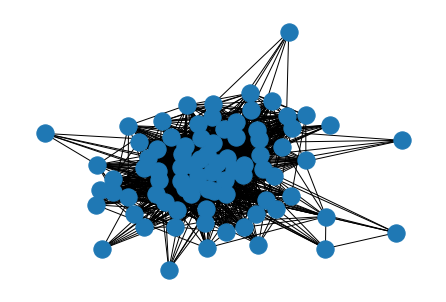

In [9]:
G = networkx.from_pandas_edgelist(department_connection_df, 'dep_1', 'dep_2', 'num_connections')
networkx.draw(G)

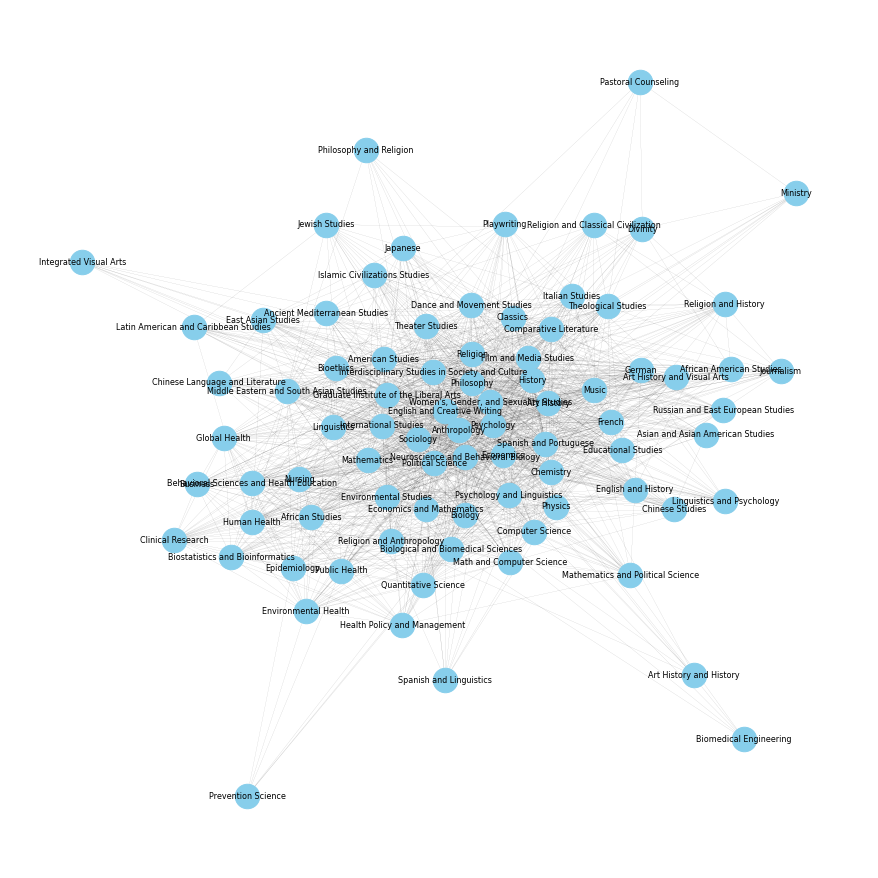

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.05, font_size=8, node_size=600)

In [11]:
betweenness = networkx.betweenness_centrality(G)
sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

[('Religion', 0.034226326205362693),
 ('Psychology', 0.034015032398097556),
 ('English and Creative Writing', 0.028923846946581202),
 ('Biology', 0.028029738972057405),
 ('History', 0.027485019430924202),
 ('Neuroscience and Behavioral Biology', 0.02716904813583802),
 ('Anthropology', 0.02505528271612096),
 ('Sociology', 0.0241272392188996),
 ("Women's, Gender, and Sexuality Studies", 0.02120367955833643),
 ('Interdisciplinary Studies in Society and Culture', 0.020781846289996662),
 ('Philosophy', 0.01989594255447184),
 ('Art History', 0.01873478978261236),
 ('Economics', 0.017699377791484488),
 ('Graduate Institute of the Liberal Arts', 0.016602487471360405),
 ('Political Science', 0.01654291701063889),
 ('International Studies', 0.013459842669473726),
 ('Chemistry', 0.013239481559296397),
 ('Biological and Biomedical Sciences', 0.011925580790169085),
 ('Music', 0.009797413344125164),
 ('Spanish and Portuguese', 0.00947780364230781),
 ('Bioethics', 0.009404739090092049),
 ('Mathematic

In [12]:
from networkx.algorithms import community
# Create empty dictionary
communities = community.greedy_modularity_communities(G)

modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

communities

[frozenset({'African American Studies',
            'American Studies',
            'Ancient Mediterranean Studies',
            'Anthropology',
            'Art History',
            'Art History and History',
            'Asian and Asian American Studies',
            'Chinese Language and Literature',
            'Chinese Studies',
            'Classics',
            'Comparative Literature',
            'Dance and Movement Studies',
            'East Asian Studies',
            'Economics',
            'Educational Studies',
            'English and Creative Writing',
            'English and History',
            'Film and Media Studies',
            'French',
            'Graduate Institute of the Liberal Arts',
            'History',
            'Integrated Visual Arts',
            'Interdisciplinary Studies in Society and Culture',
            'International Studies',
            'Islamic Civilizations Studies',
            'Italian Studies',
            'Japanese',
          

In [13]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [14]:
import pickle

In [15]:
import pickle

file = open('dep_centrality_pickle', 'ab')

pickle.dump(betweenness, file)
file.close()

In [14]:
list(G.degree())

[('Neuroscience and Behavioral Biology', 66),
 ('Biology', 61),
 ('Psychology', 70),
 ('Math and Computer Science', 36),
 ('Chemistry', 54),
 ('Epidemiology', 34),
 ('Behavioral Sciences and Health Education', 39),
 ('Global Health', 34),
 ('Biological and Biomedical Sciences', 47),
 ('Ministry', 9),
 ('Divinity', 16),
 ('Religion', 66),
 ('Biostatistics and Bioinformatics', 31),
 ('Public Health', 29),
 ('Clinical Research', 26),
 ('Environmental Health', 30),
 ('Nursing', 43),
 ('African Studies', 29),
 ("Women's, Gender, and Sexuality Studies", 58),
 ('Music', 55),
 ('Human Health', 36),
 ('Sociology', 67),
 ('Theological Studies', 34),
 ('Health Policy and Management', 23),
 ('Anthropology', 68),
 ('Business', 30),
 ('Environmental Studies', 44),
 ('French', 43),
 ('Comparative Literature', 41),
 ('Graduate Institute of the Liberal Arts', 62),
 ('Philosophy', 62),
 ('English and Creative Writing', 69),
 ('History', 67),
 ('Spanish and Portuguese', 53),
 ('German', 34),
 ('Physics',

NameError: name 'num_topics' is not defined